In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import requests

In [3]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [4]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

In [5]:
df = pd.read_csv('dados/Most Popular Programming Languages from 2004 to 2021 V4.csv')
df.head(10)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24
5,December 2004,0.36,0.37,9.56,5.23,0.53,0.0,2.77,0.0,0.09,...,19.73,2.71,0.40,0.42,0.13,0.04,0.0,0.0,1.46,8.08
6,January 2005,0.39,0.38,9.70,5.23,0.56,0.0,2.65,0.0,0.11,...,19.81,2.91,0.39,0.47,0.15,0.03,0.0,0.0,1.51,7.79
7,February 2005,0.37,0.39,9.88,5.21,0.49,0.0,2.66,0.0,0.07,...,19.63,2.87,0.38,0.45,0.15,0.03,0.0,0.0,1.45,7.67
8,March 2005,0.34,0.37,9.88,5.38,0.45,0.0,2.65,0.0,0.08,...,19.54,2.81,0.42,0.46,0.13,0.03,0.0,0.0,1.44,7.68
9,April 2005,0.34,0.36,9.85,5.42,0.41,0.0,2.56,0.0,0.08,...,19.93,2.78,0.40,0.43,0.11,0.02,0.0,0.0,1.36,7.52


In [6]:
for column in df.columns:
    print(column)
print('\nTotal de colunas: {}.'.format(len(df.columns)))

Date
Abap
Ada
C/C++
C#
Cobol
Dart
Delphi
Go
Groovy
Haskell
Java
JavaScript
Julia
Kotlin
Lua
Matlab
Objective-C
Perl
PHP
Python
R
Ruby
Rust
Scala
Swift
TypeScript
VBA
Visual Basic

Total de colunas: 29.


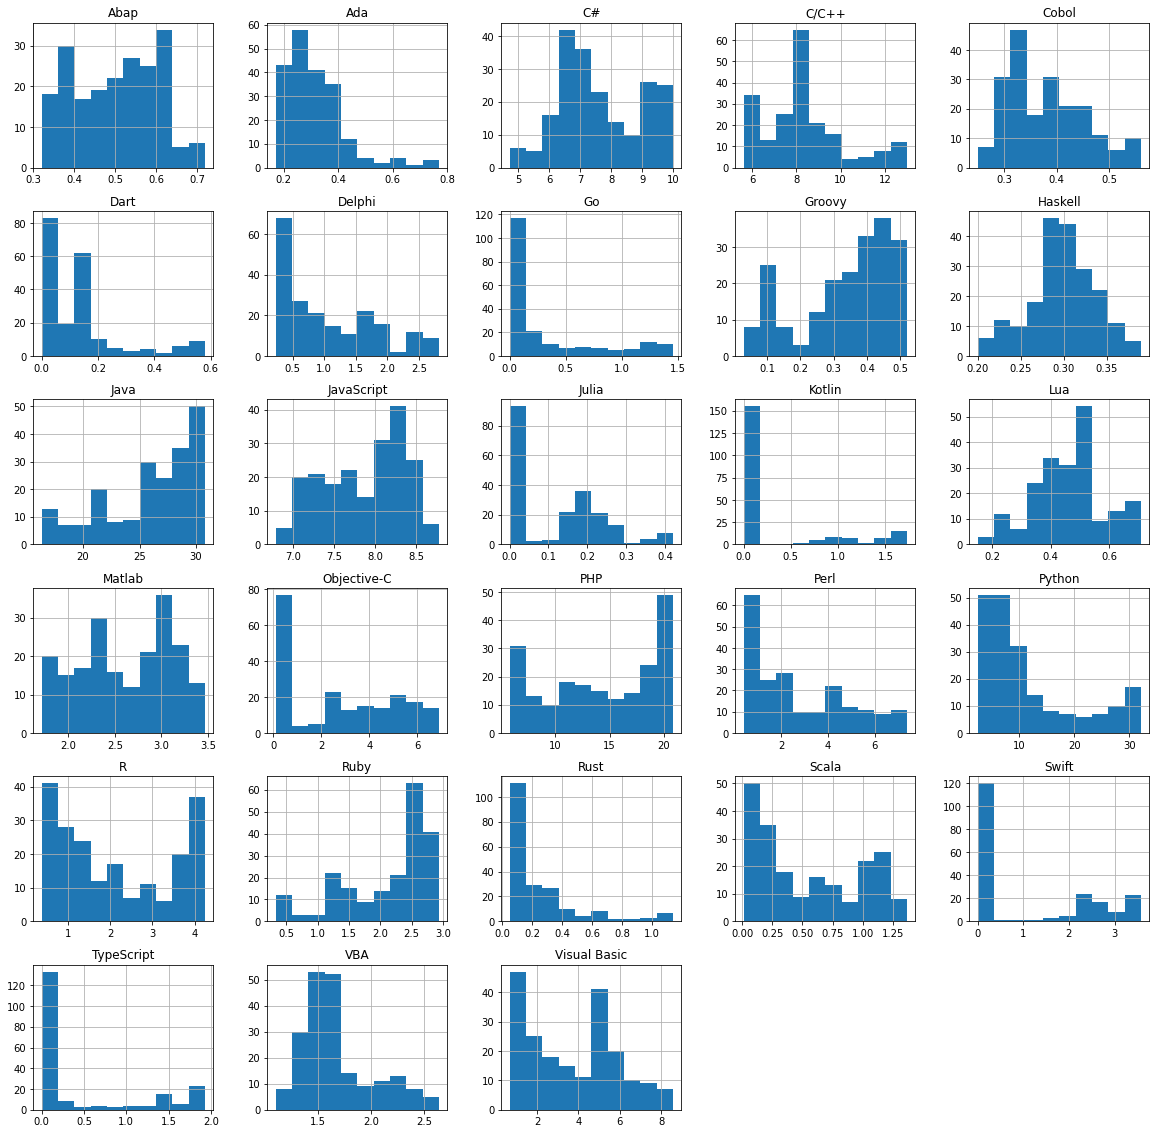

In [7]:
df.hist()
configurar_plot_com_dimensoes('Histograma Linguagens', '', '', 20, 20)
plt.show()

In [8]:
def createDataFrameFor(df, colunas, colunaAtual):
    return pd.DataFrame(
        {
            'Date': df.Date,
            'Year': pd.DatetimeIndex(df['Date']).year,
            'Timestamp': map(lambda i : datetime.strptime(df["Date"][i], '%B %Y'), range(len(df.Date))),
            'Language': colunas[colunaAtual],
            'Value': df[df.columns[colunaAtual]]
        }
    )

colunas = df.columns

dados_tratados = createDataFrameFor(df, colunas, 1)

for coluna in range(1, len(colunas)):
    dados_tratados = pd.concat([dados_tratados, createDataFrameFor(df, colunas, coluna)])

dados_tratados.reset_index(drop=True, inplace=True)

dados_tratados['UnixTime'] = list(map(lambda i: (pd.to_datetime([dados_tratados['Timestamp'][i]]).astype(int) / 10**9)[0], range(len(dados_tratados['Date']))))

dados_tratados.head()

,Date,Year,Timestamp,Language,Value,UnixTime
0,July 2004,2004,2004-07-01,Abap,0.34,1.088640e+09
1,August 2004,2004,2004-08-01,Abap,0.36,1.091318e+09
2,September 2004,2004,2004-09-01,Abap,0.41,1.093997e+09
3,October 2004,2004,2004-10-01,Abap,0.40,1.096589e+09
4,November 2004,2004,2004-11-01,Abap,0.38,1.099267e+09


In [9]:
dados_tratados.to_csv('dados/Dados.csv')

In [10]:
dados_agrupados = dados_tratados[['Language', 'Value']].groupby(by=['Language'], as_index=False).sum()

dados_agrupados = dados_agrupados.sort_values(by=['Value'], ascending=False)

dados_agrupados

,Language,Value
10,Java,5265.13
17,PHP,2872.86
19,Python,2419.33
3,C/C++,1691.65
11,JavaScript,1598.16
2,C#,1543.45
27,Visual Basic,754.92
16,Objective-C,546.40
18,Perl,543.92
15,Matlab,531.17


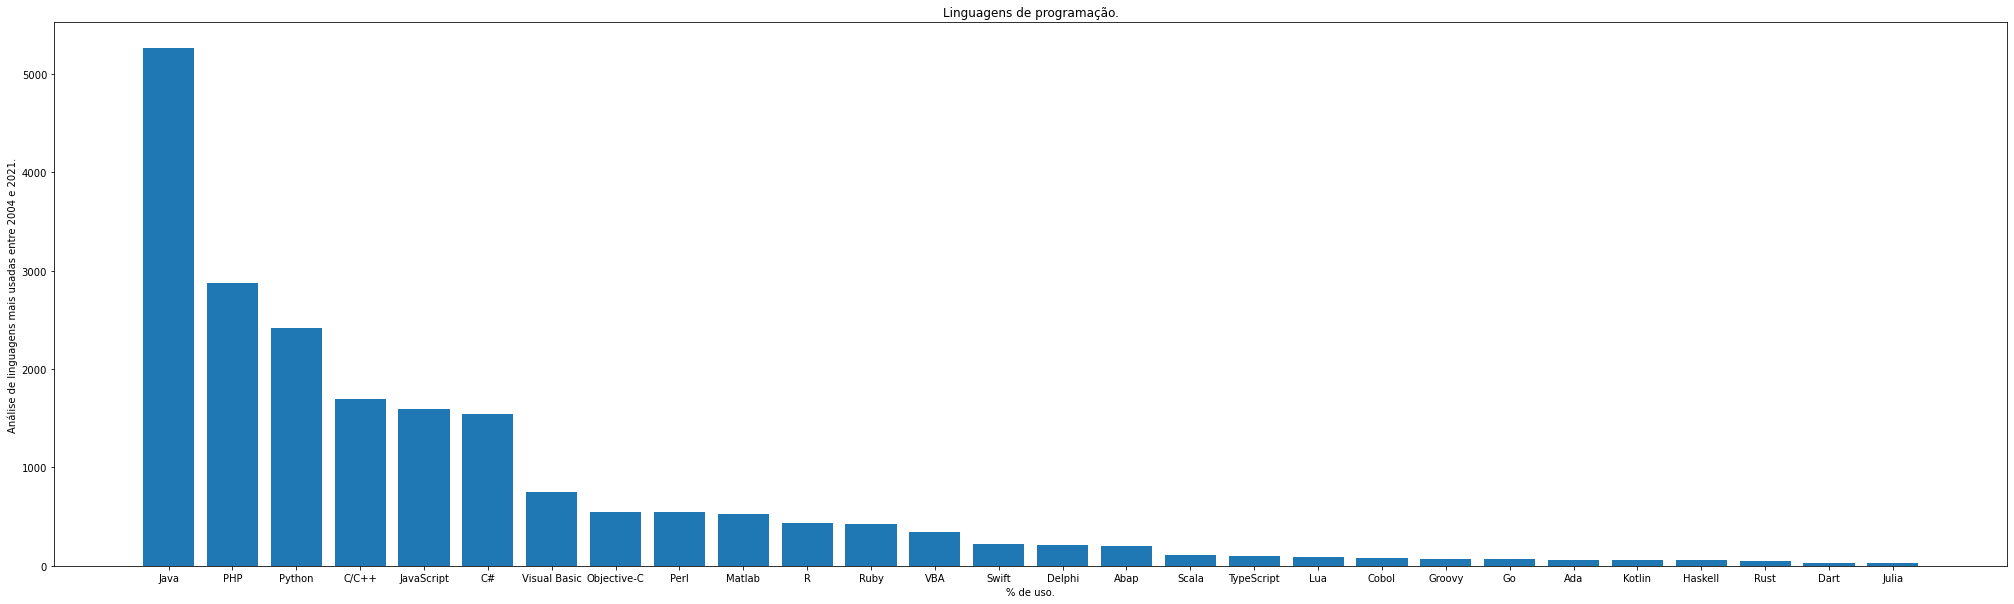

In [11]:
fig, ax = plt.subplots()

ax.set_xticklabels(dados_agrupados['Language'])

ax.bar(x = dados_agrupados['Language'], height = dados_agrupados['Value'])
plt.gcf().set_size_inches(35, 10)
plt.savefig('imgs/Analise Linguagens.png')
configurar_plot_com_dimensoes(
    'Linguagens de programação.',
    '% de uso.',
    'Análise de linguagens mais usadas entre 2004 e 2021.',
    35, 
    10
)

### Visualizando o mapa de calor das linguagens de programação

In [14]:
plt.figure(figsize = (20,10))
mapa_calor = sns.heatmap(dados_tratados, cmap="mako", yticklabels = False)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1440x720 with 0 Axes>

### Verificando correlação entre as variáveis

* Equal to 1     -> Perfect positive linear relationship
* Greater than 0 -> Positive correlation
* Equal to 0     -> No linear relationship
* Less than 0    -> Negative correlation
* Equal to -1    -> Perfect negative linear relationship

In [12]:
def verificar_correlacao(linguagem_1, linguagem_2):
    print('Verificando a correlação Pearson entre os % de uso das linguagens: {} e {}.'.format(linguagem_1, linguagem_2))
    corr = df[linguagem_1].corr(df[linguagem_2])
    result = ''
    print(corr)
    if (corr == 1):
        result = 'correlação linear positiva perfeita'
    if (corr > 0):
        result = 'correlação linear positiva'
    if (corr == 0):
        result = 'correlação linear inexistente'
    if (corr == -1):
        result = 'correlação linear negativa perfeita'
    if (corr < 0):
        result = 'correlação linear negativa'
    print('{} e {} possuem {}.\n'.format(linguagem_1, linguagem_2, result))
    
    
def plotar_correlacao(linguagem_1, linguagem_2):
    df.plot.scatter(x = linguagem_1, y = linguagem_2, c = 'Darkblue')

    configurar_plot_com_dimensoes('', '', 'Correlação entre {} e {}.'.format(linguagem_1, linguagem_2), 20, 10)
    

Verificando a correlação Pearson entre os % de uso das linguagens: Java e JavaScript.
-0.1759104243423126
Java e JavaScript possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e Python.
-0.9815602884038716
Java e Python possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e Python.
0.24168739345302312
JavaScript e Python possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e TypeScript.
0.4127565560616799
JavaScript e TypeScript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e C/C++.
0.6779880318013292
Java e C/C++ possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: PHP e JavaScript.
-0.07984499408856426
PHP e JavaScript possuem correlação linear negativa.

Verificando a correlação Pearson entre 

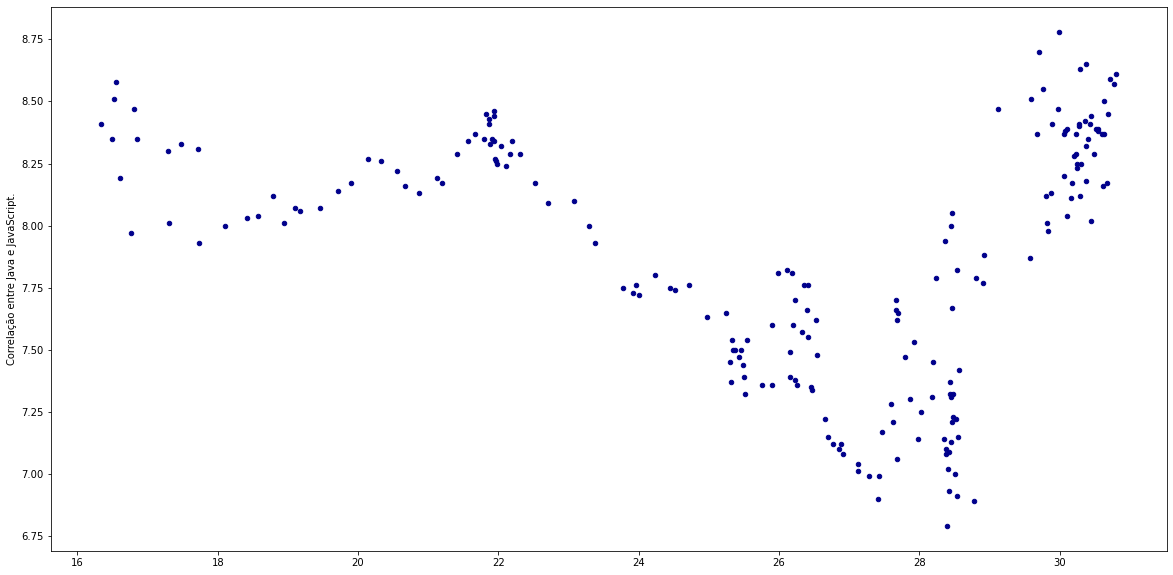

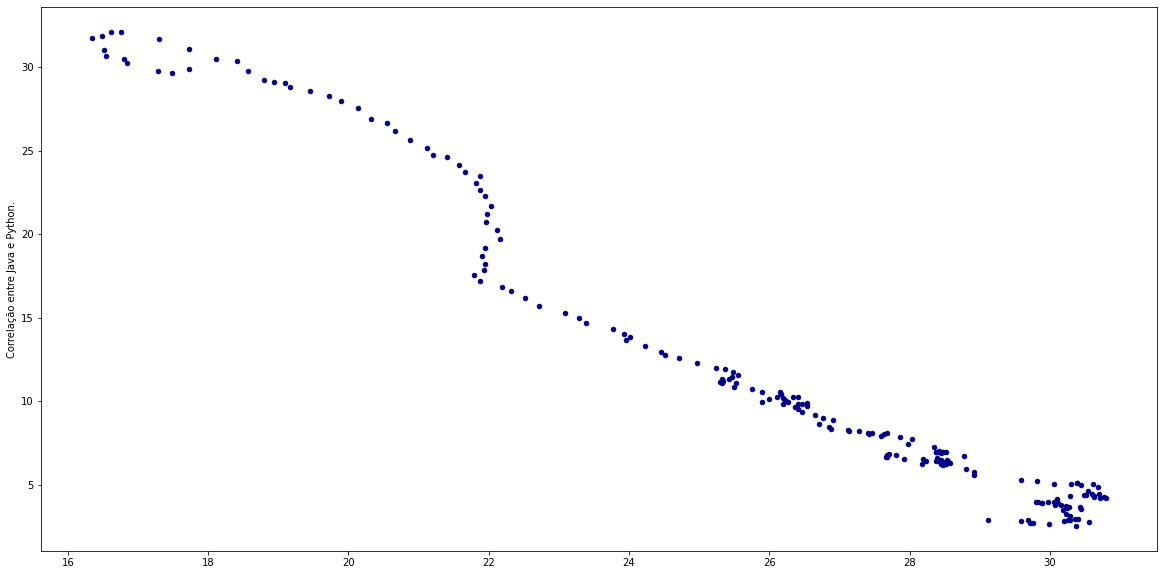

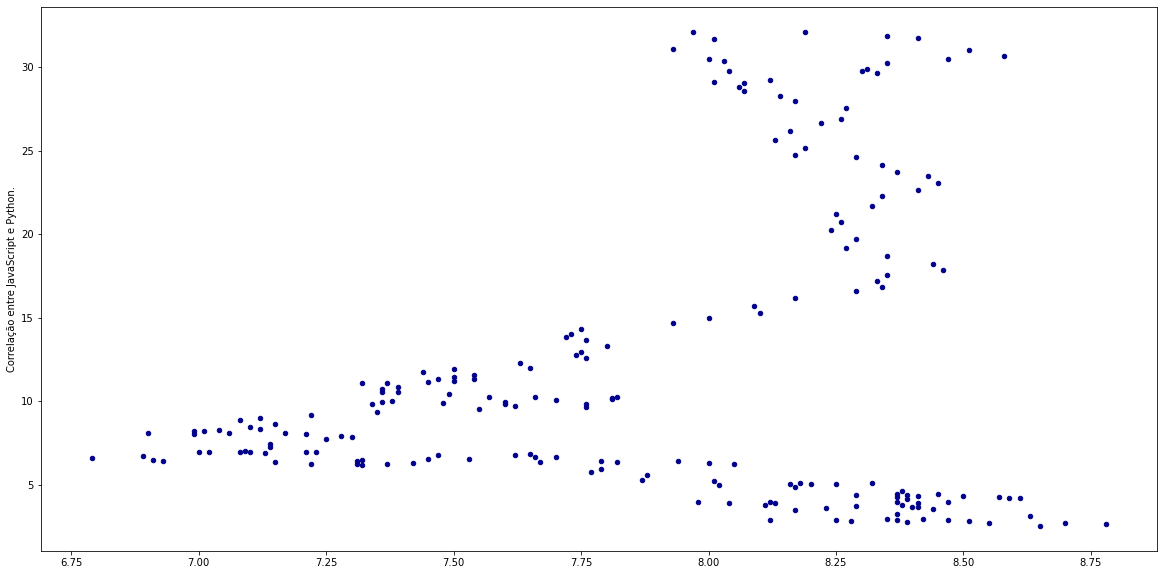

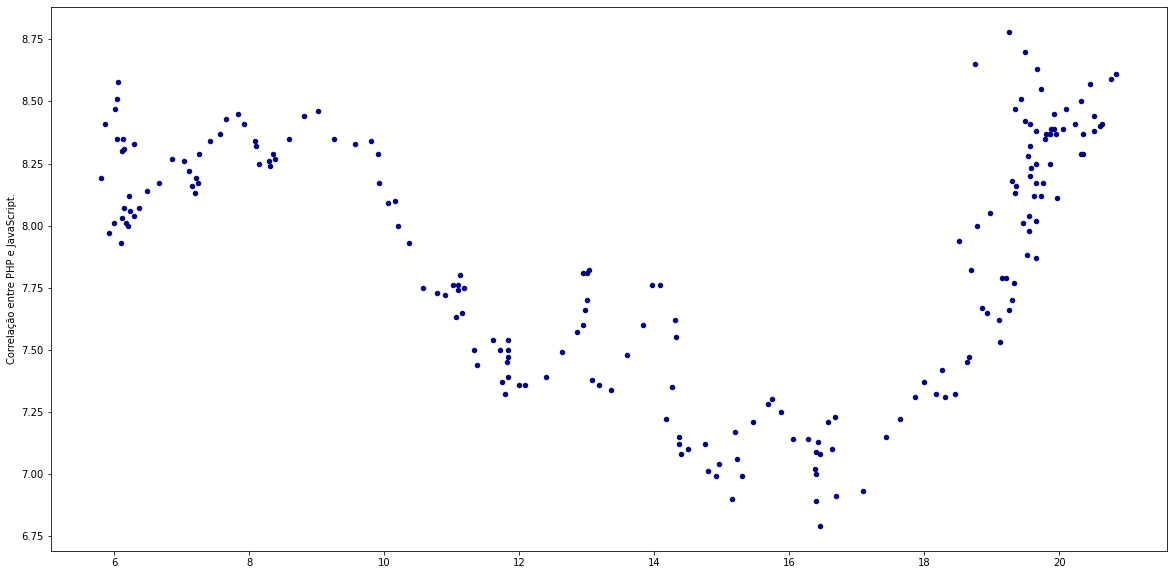

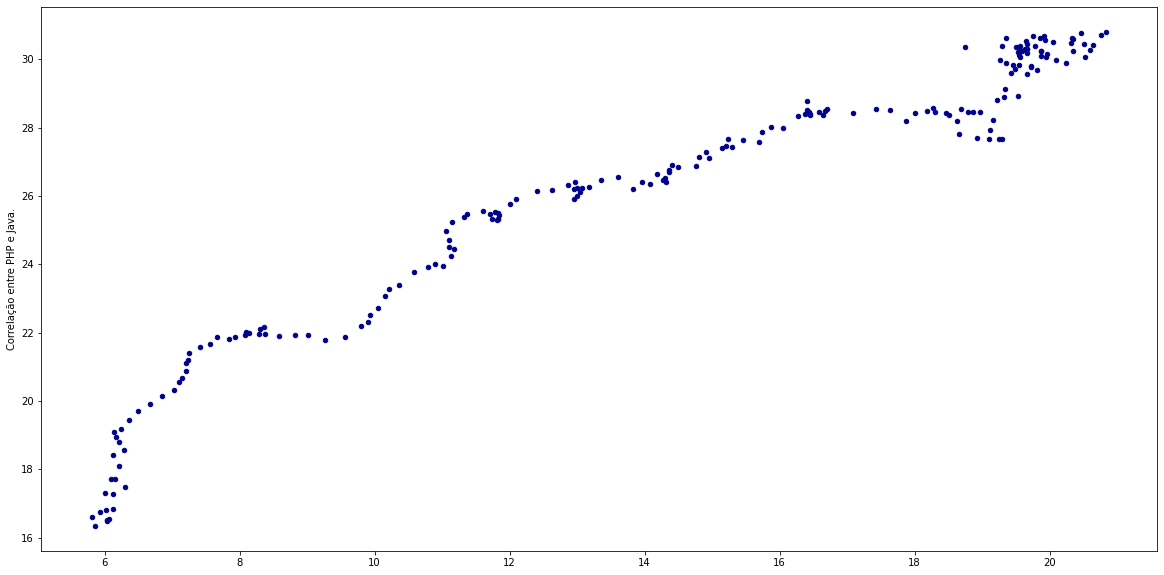

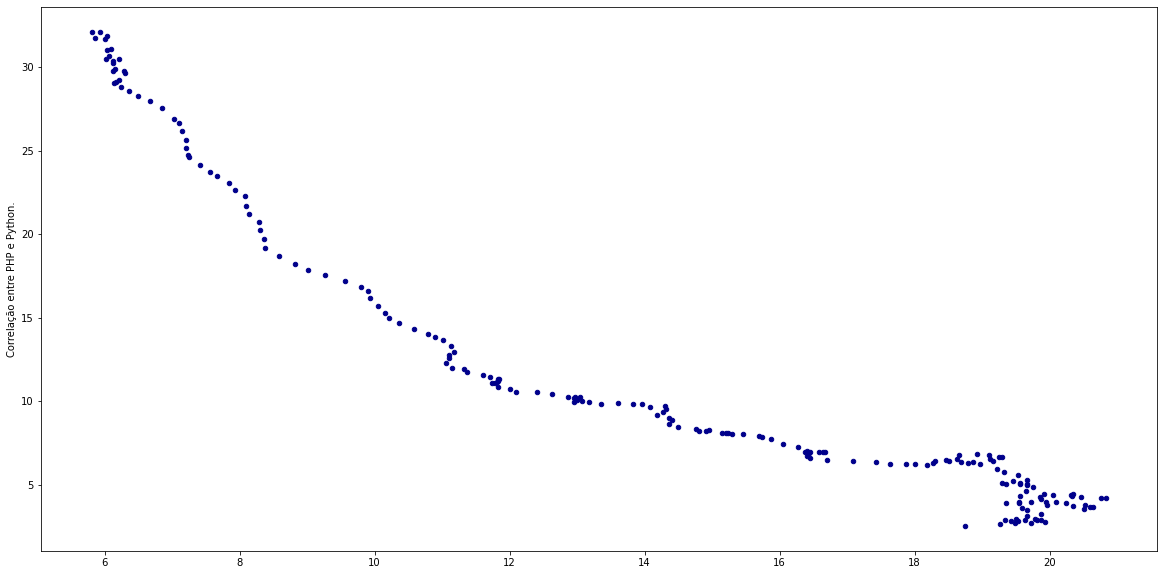

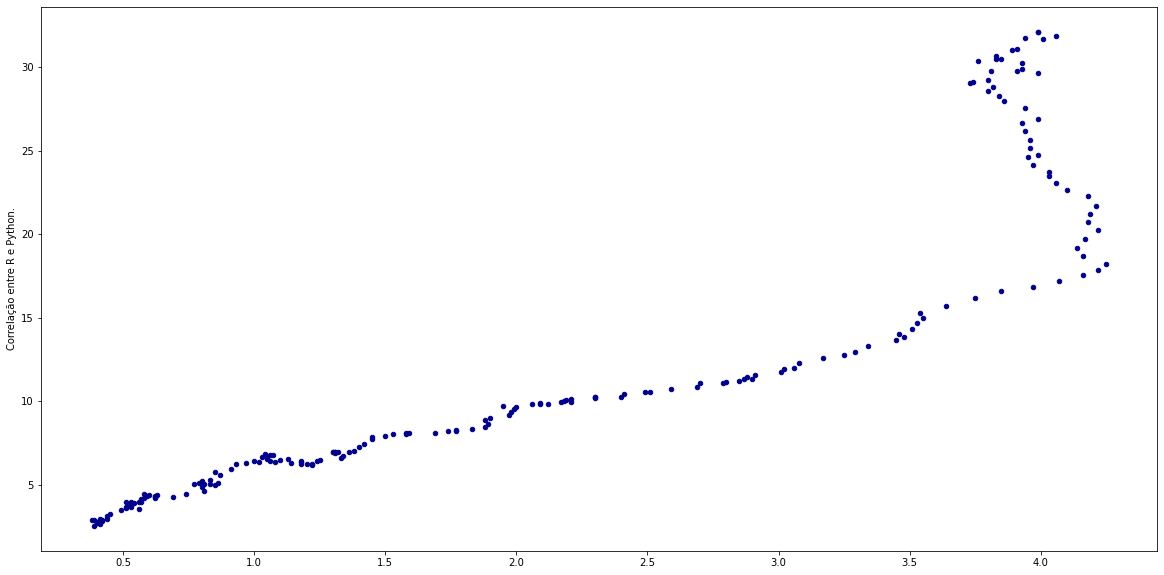

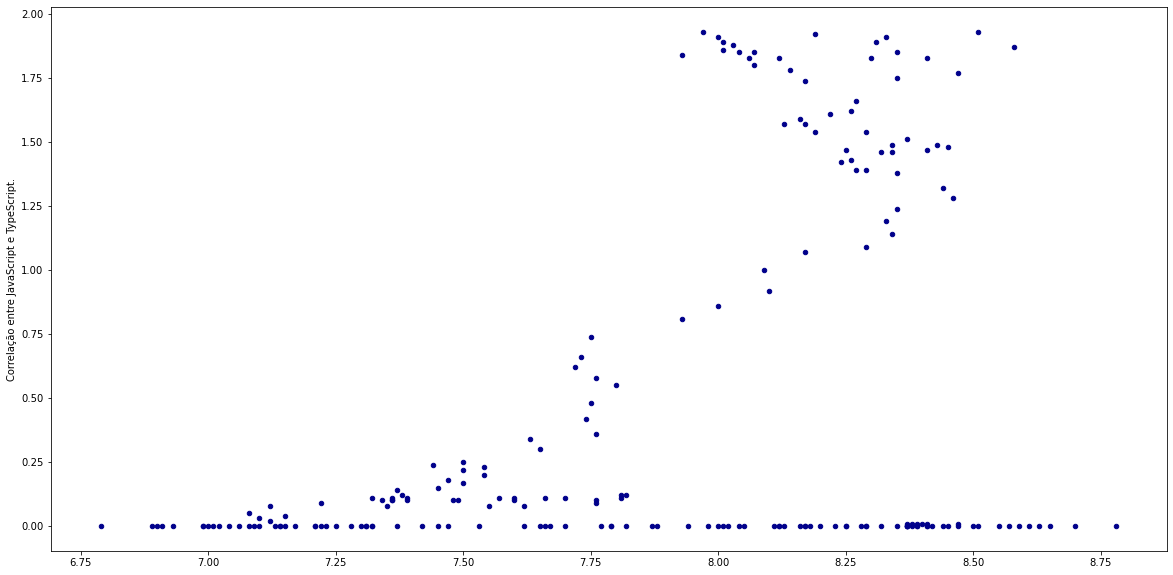

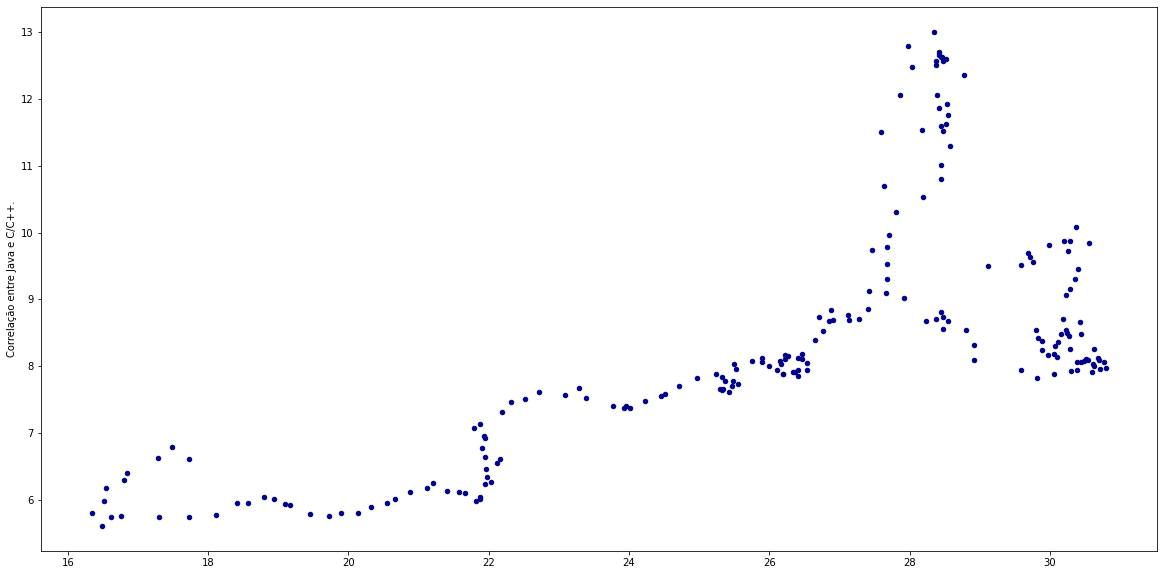

In [13]:
verificar_correlacao('Java', 'JavaScript')
verificar_correlacao('Java', 'Python')
verificar_correlacao('JavaScript', 'Python')
verificar_correlacao('JavaScript', 'TypeScript')
verificar_correlacao('Java', 'C/C++')

verificar_correlacao('PHP', 'JavaScript')
verificar_correlacao('PHP', 'Java')
verificar_correlacao('PHP', 'Python')

verificar_correlacao('R', 'Python')
verificar_correlacao('R', 'JavaScript')
verificar_correlacao('R', 'TypeScript')

plotar_correlacao('Java', 'JavaScript')
plotar_correlacao('Java', 'Python')
plotar_correlacao('JavaScript', 'Python')

plotar_correlacao('PHP', 'JavaScript')
plotar_correlacao('PHP', 'Java')
plotar_correlacao('PHP', 'Python')

plotar_correlacao('R', 'Python')
plotar_correlacao('JavaScript', 'TypeScript')
plotar_correlacao('Java', 'C/C++')

In [14]:
verificar_correlacao('Python', 'R')

Verificando a correlação Pearson entre os % de uso das linguagens: Python e R.
0.9028122654817622
Python e R possuem correlação linear positiva.



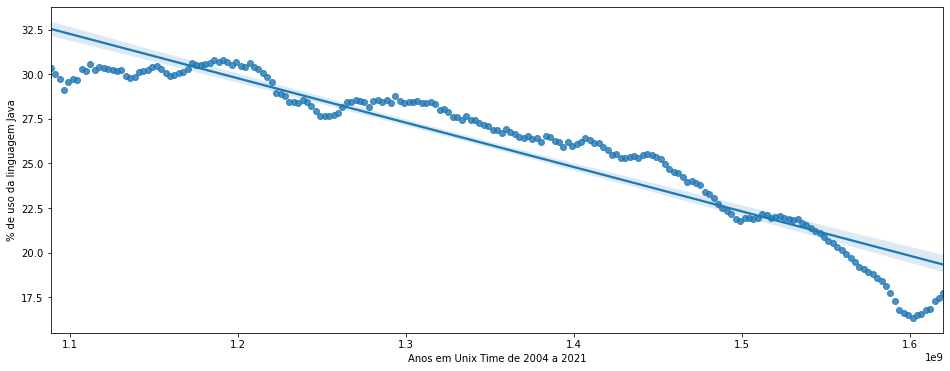

In [15]:
df_java = dados_tratados[dados_tratados['Language'] == 'Java']
sns.regplot(x="UnixTime", y="Value", data= df_java)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

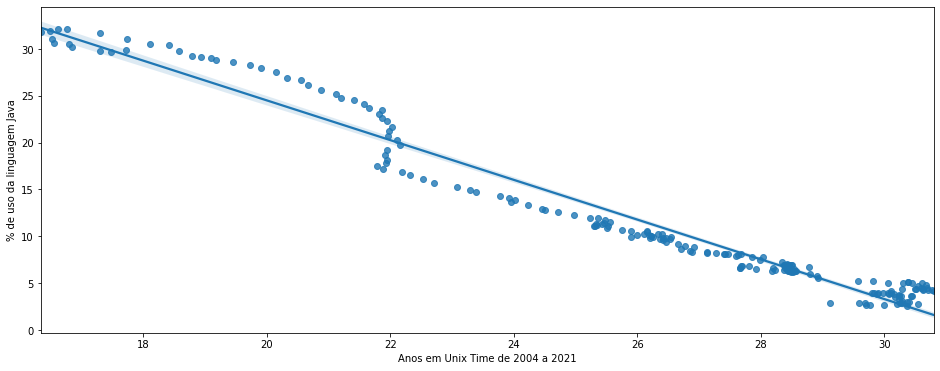

In [16]:
t = df[['Java', 'Python']]
sns.regplot(x="Java", y="Python", data=t)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

In [17]:
def prever_regressao_linguagem(linguagem_1, linguagem_2):
    df_linguagem = df[[linguagem_1, linguagem_2]]

    X = df_linguagem[linguagem_1].values.reshape(-1, 1)
    y = df_linguagem[linguagem_2].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('Regressão linera entre % de uso das linguagens {} e {}.'.format(linguagem_1, linguagem_2))
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

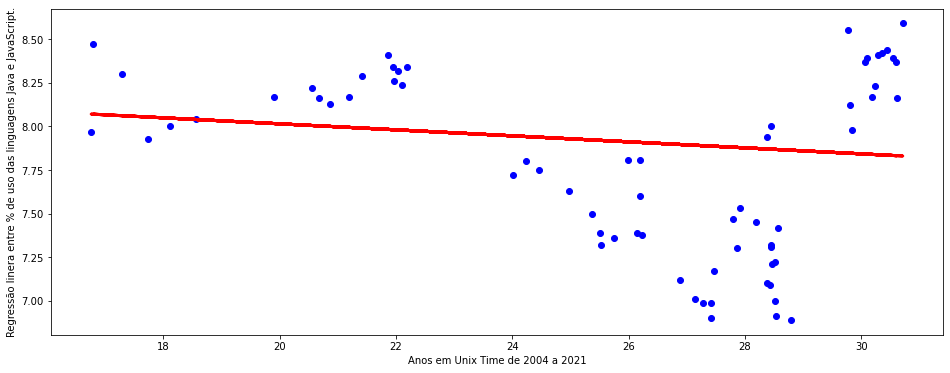

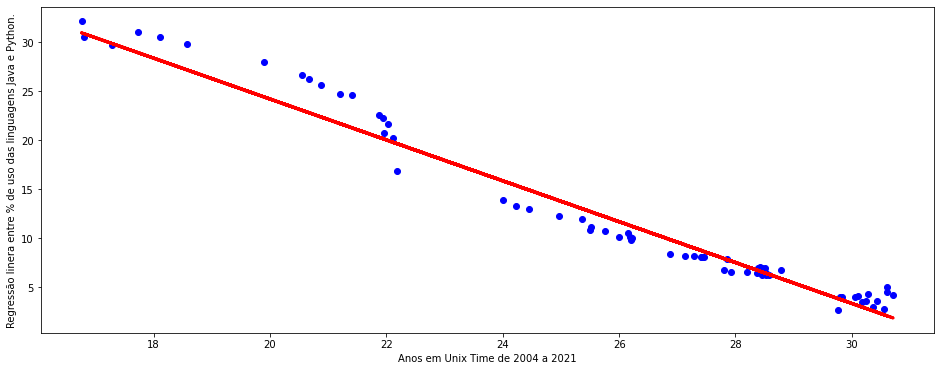

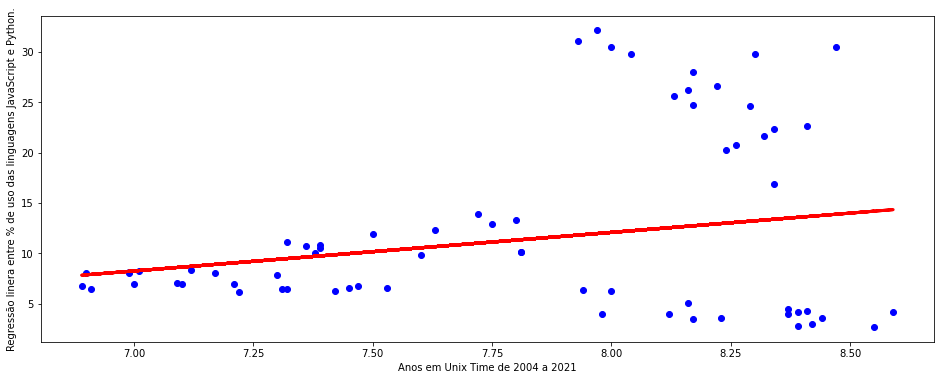

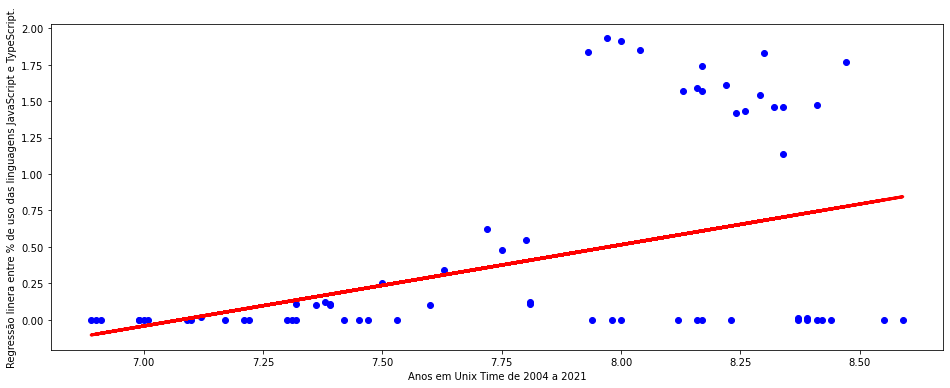

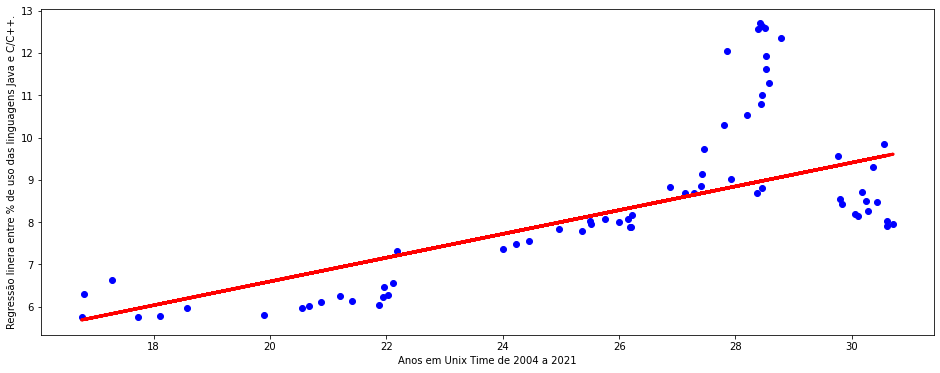

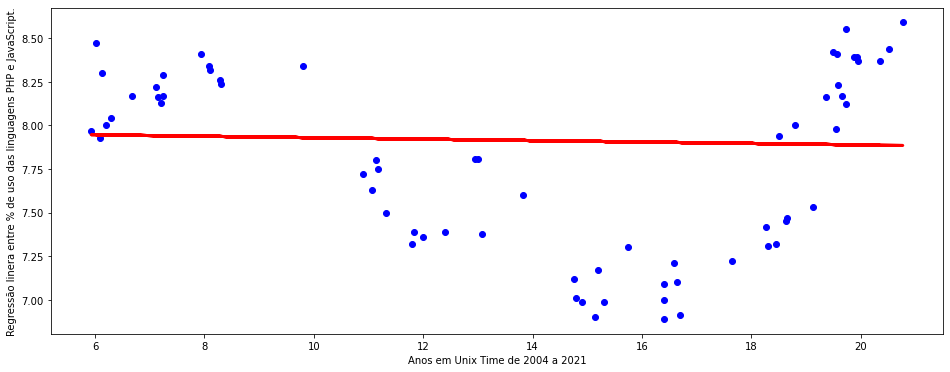

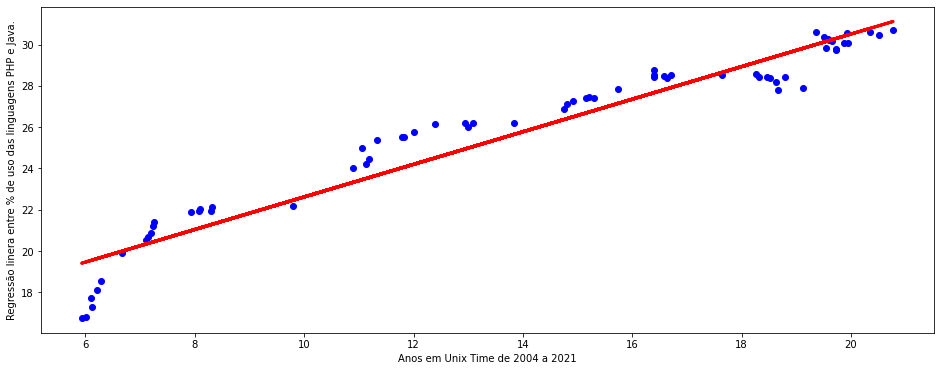

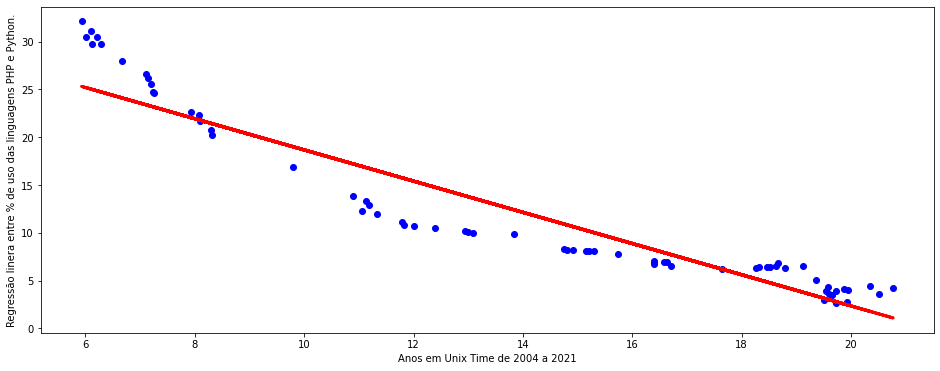

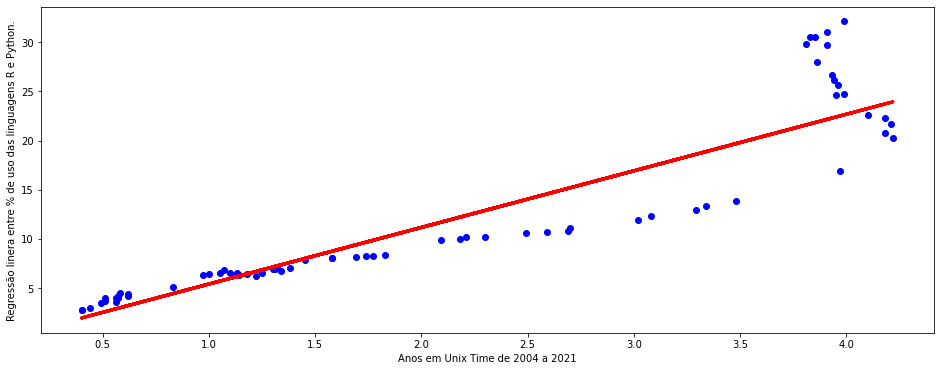

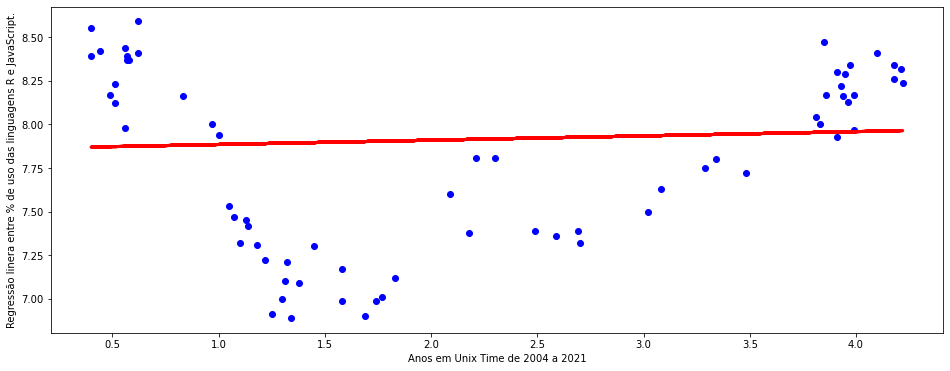

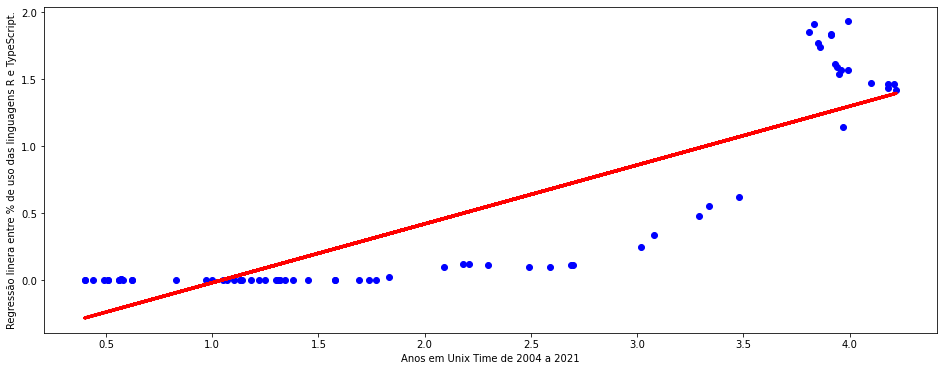

In [18]:
prever_regressao_linguagem('Java', 'JavaScript')
prever_regressao_linguagem('Java', 'Python')
prever_regressao_linguagem('JavaScript', 'Python')
prever_regressao_linguagem('JavaScript', 'TypeScript')
prever_regressao_linguagem('Java', 'C/C++')

prever_regressao_linguagem('PHP', 'JavaScript')
prever_regressao_linguagem('PHP', 'Java')
prever_regressao_linguagem('PHP', 'Python')

prever_regressao_linguagem('R', 'Python')
prever_regressao_linguagem('R', 'JavaScript')
prever_regressao_linguagem('R', 'TypeScript')

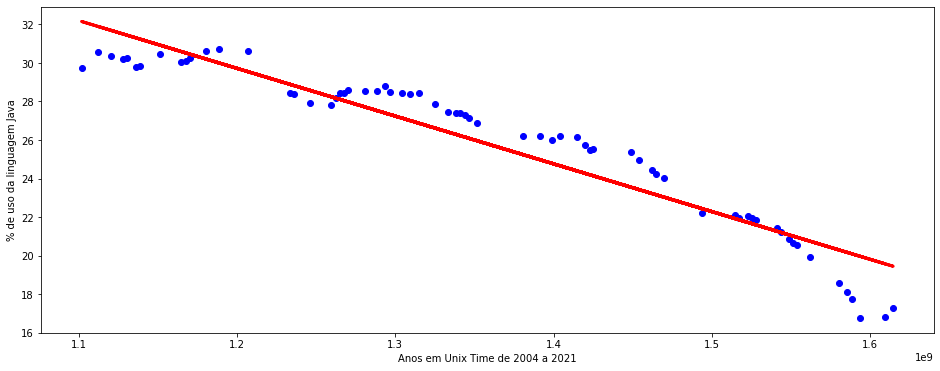

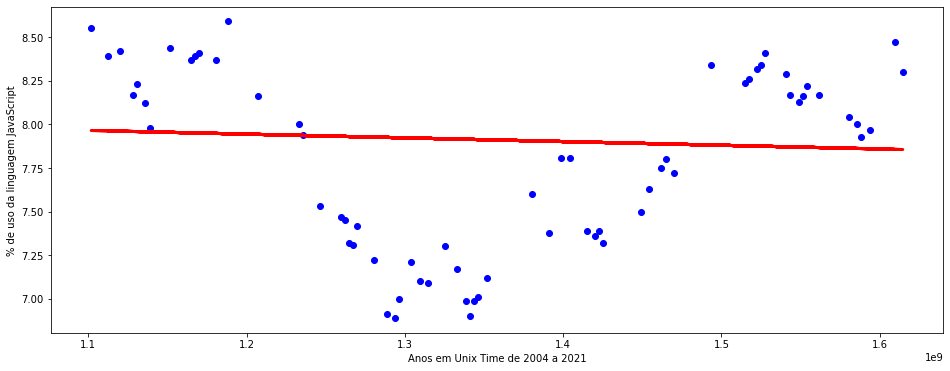

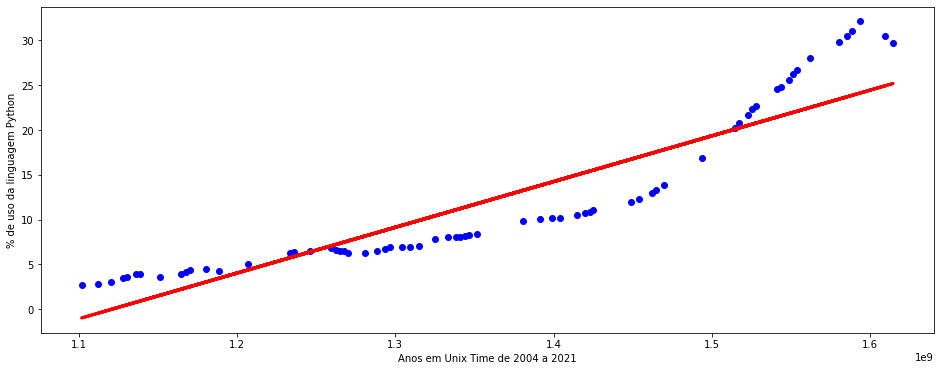

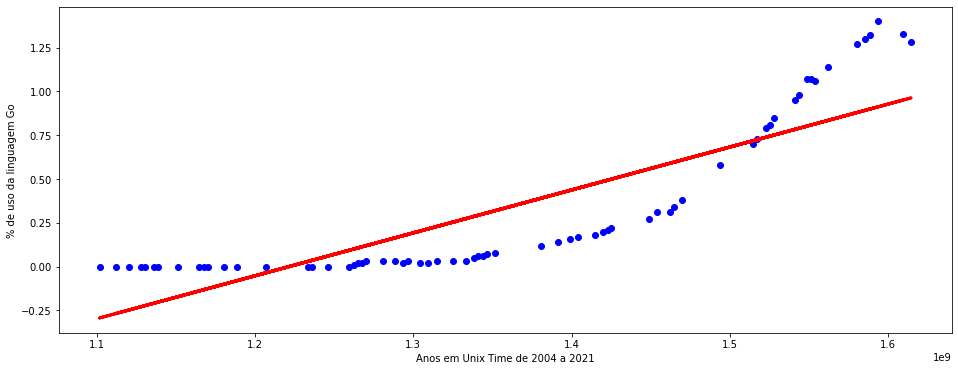

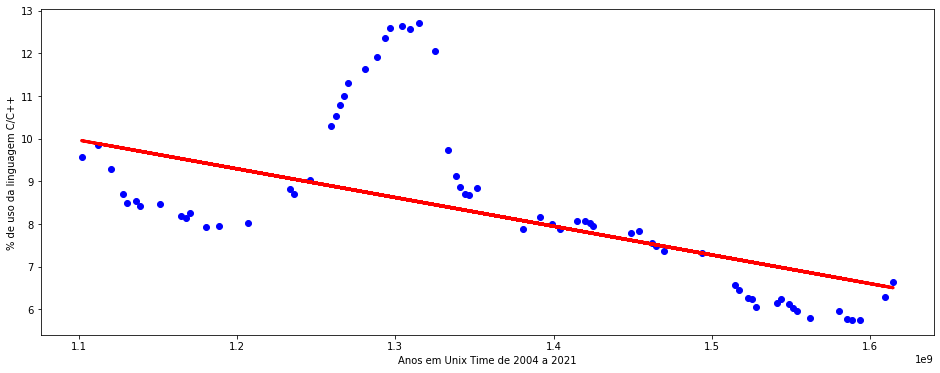

In [25]:
def prever_regressao_linguagem(linguagem):
    df_linguagem = dados_tratados[dados_tratados['Language'] == linguagem]

    X = df_linguagem.UnixTime.values.reshape(-1, 1)
    y = df_linguagem.Value.values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('% de uso da linguagem {}'.format(linguagem))
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

prever_regressao_linguagem('Java')
prever_regressao_linguagem('JavaScript')
prever_regressao_linguagem('Python')
prever_regressao_linguagem('Go')
prever_regressao_linguagem('C/C++')

In [19]:
dados = df
dados.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [20]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.set_index('Date', inplace = True) 

dados.head()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,0.22,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
2004-08-01,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,0.20,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2004-09-01,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,0.21,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
2004-10-01,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,0.20,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
2004-11-01,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,0.24,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [21]:
dados.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.498030,0.311478,8.333251,7.603202,0.381034,0.121576,1.055172,0.322906,0.334089,0.298621,...,14.152020,11.917882,2.119803,2.112365,0.246404,0.538867,1.109409,0.470788,1.679015,3.718818
std,0.102097,0.110269,1.807976,1.306233,0.071528,0.149658,0.757032,0.451741,0.137936,0.039728,...,4.983405,8.768295,1.351934,0.707304,0.254726,0.438289,1.387316,0.695970,0.333993,2.206892
min,0.320000,0.170000,5.610000,4.710000,0.250000,0.000000,0.230000,0.000000,0.030000,0.200000,...,5.810000,2.530000,0.380000,0.330000,0.050000,0.010000,0.000000,0.000000,1.100000,0.670000
25%,0.400000,0.230000,7.395000,6.575000,0.320000,0.000000,0.370000,0.000000,0.260000,0.280000,...,9.990000,5.435000,0.855000,1.580000,0.080000,0.150000,0.000000,0.000000,1.440000,1.580000
50%,0.510000,0.300000,8.080000,7.330000,0.370000,0.110000,0.810000,0.080000,0.380000,0.300000,...,14.500000,8.440000,1.880000,2.440000,0.120000,0.410000,0.000000,0.030000,1.610000,3.700000
75%,0.580000,0.360000,8.940000,8.935000,0.430000,0.135000,1.680000,0.505000,0.450000,0.320000,...,19.300000,15.925000,3.685000,2.650000,0.340000,1.000000,2.455000,1.035000,1.780000,5.375000
max,0.720000,0.770000,13.000000,10.000000,0.560000,0.580000,2.820000,1.460000,0.520000,0.390000,...,20.840000,32.110000,4.250000,2.940000,1.140000,1.370000,3.580000,1.930000,2.640000,8.570000


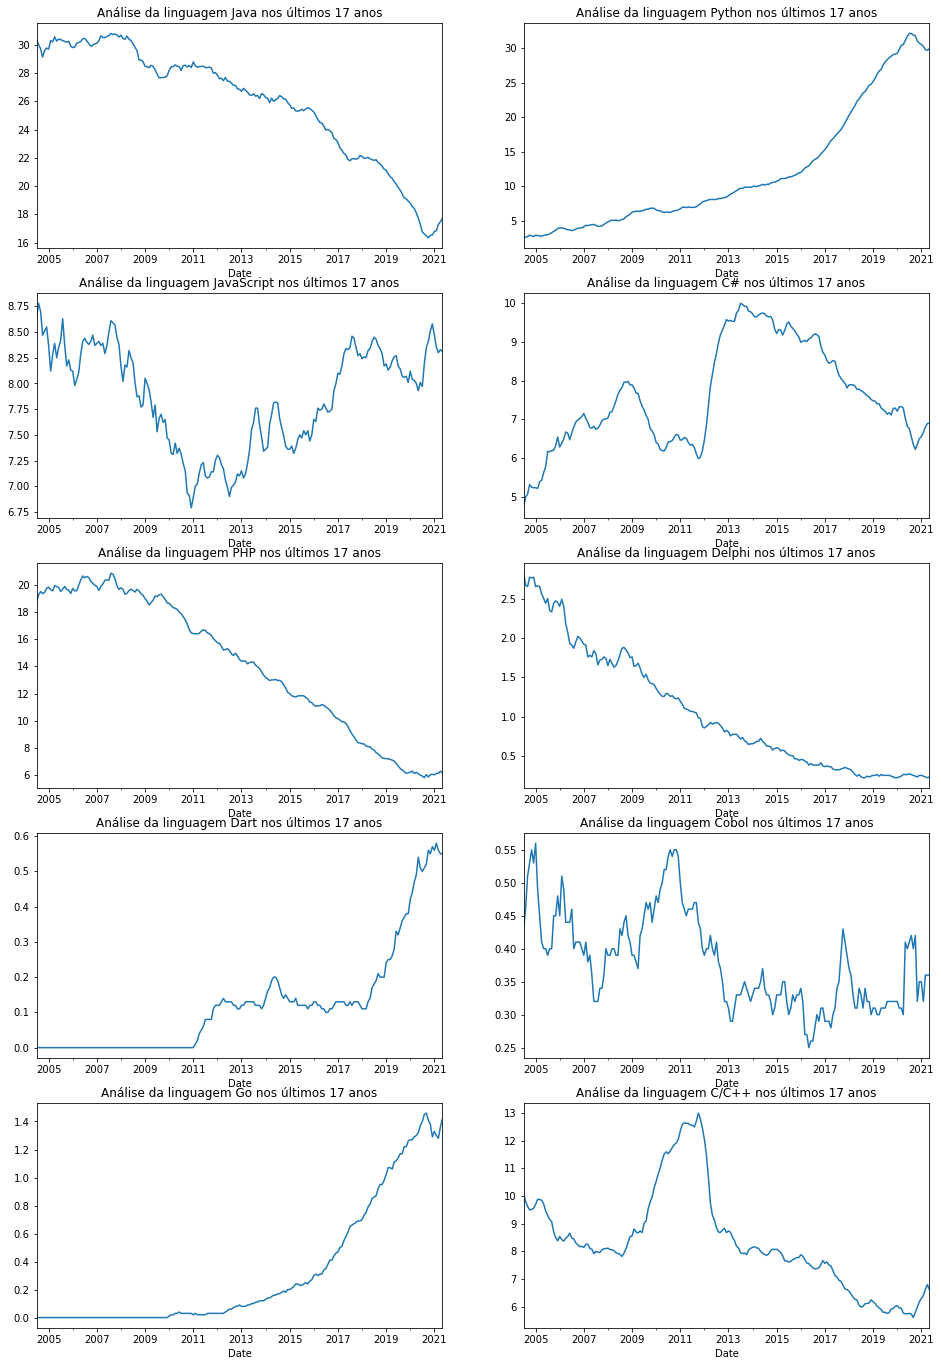

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=2)

dados['Java'].plot(ax=axes[0,0], title = "Análise da linguagem Java nos últimos 17 anos")
dados['JavaScript'].plot(ax=axes[1,0], title = "Análise da linguagem JavaScript nos últimos 17 anos")
dados['Python'].plot(ax=axes[0,1], title = "Análise da linguagem Python nos últimos 17 anos")
dados['C#'].plot(ax=axes[1,1], title = "Análise da linguagem C# nos últimos 17 anos")
dados['PHP'].plot(ax=axes[2,0], title = "Análise da linguagem PHP nos últimos 17 anos")
dados['Delphi'].plot(ax=axes[2,1], title = "Análise da linguagem Delphi nos últimos 17 anos")
dados['Dart'].plot(ax=axes[3,0], title = "Análise da linguagem Dart nos últimos 17 anos")
dados['Cobol'].plot(ax=axes[3,1], title = "Análise da linguagem Cobol nos últimos 17 anos")
dados['Go'].plot(ax=axes[4,0], title = "Análise da linguagem Go nos últimos 17 anos")
dados['C/C++'].plot(ax=axes[4,1], title = "Análise da linguagem C/C++ nos últimos 17 anos")

plt.gcf().set_size_inches(16, 24)

plt.savefig('imgs/Comparação linguagens 17 anos')
plt.show()

### Implementando o algoritmo K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
# X = dados_agrupados.Language.values.reshape(-1, 1)
# y = dados_agrupados.Value.values.reshape(-1, 1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)

Análise da Query no Stackoverflow:

```sql
SELECT 
  YEAR(Posts.CreationDate) as 'Year',
  Tags.tagName,
  COUNT(*) AS Question
FROM Tags
  LEFT JOIN PostTags ON PostTags.TagId = Tags.Id
  LEFT JOIN Posts ON Posts.Id = PostTags.PostId
WHERE
  Tags.tagName IN (
    'java',
    'javascript',
    'python',
    'go',
    'c#', 
    'c', 
    'c++', 
    'php'
  )
GROUP BY
  Year(Posts.CreationDate), Tags.TagName
ORDER BY 
  Year(Posts.CreationDate) DESC
```

# Analisando dados de 2017

In [ ]:
dados = pd.read_csv('dados/user-languages.csv')[['user_id', 'java', 'javascript', 'typescript', 'php', 'python', 'c#', 'go']]
dados.head()

Colunas disponíveis:

In [ ]:
len(dados.columns)

In [ ]:
list(dados.columns)

In [ ]:
dados[['user_id', 'java']]

In [ ]:
dados.hist()
configurar_plot('', '', 'Histograma das linguagens a serem analisadas')

In [ ]:
dados_agrupados = dados.groupby(by="user_id").sum().T
dados_agrupados['007lva']

In [ ]:
dft = pd.DataFrame(
    {
        'Language': list(map(lambda i: i, dados.columns[1:])),
        'Value':    list(map(lambda i: dados[i].sum(), dados.columns[1:]))
    }
)
dft.head()

In [ ]:
dft.hist()
configurar_plot('', '', '')